In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('./全部数据/附件1-区域15分钟负荷数据.csv', parse_dates=['数据时间'], index_col=[0])
day_mean = pd.read_csv('./2021八月份日平均功率预测值.csv', index_col=0, parse_dates=['数据时间'])
daily_change = pd.read_csv('./2021八月份日功率波动预测值.csv', index_col=0, parse_dates=['数据时间'])

In [4]:
# 选取8月16号到8月31号的数据来分析预测精度

predict_ls = [day_mean.values[:,0][i] + daily_change.values[:,0][96*i+j] for i in range(31) for j in range(96)]
y_pred = pd.DataFrame(predict_ls, index=daily_change.index, columns=['总有功功率（kw）'])['2021-08-16':'2021-08-31']

y_test = data['2021-08-16':'2021-08-31']

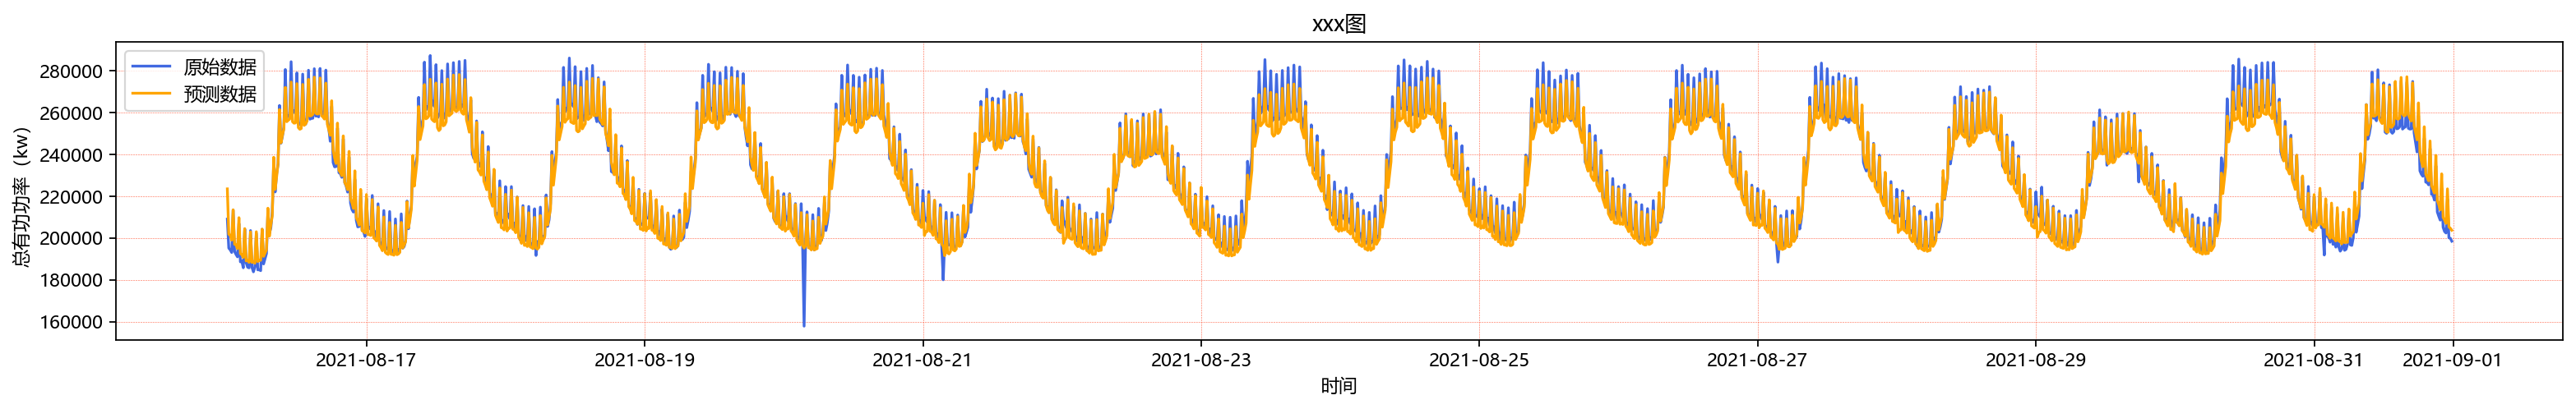

In [39]:
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.figure(figsize=(24,3), dpi=160)
plt.grid(color = 'tomato', linestyle = '--', linewidth = 0.25)
plt.title('原始数据与预测图')
plt.ylabel('总有功功率（kw）')
plt.xlabel('时间')
plt.plot(y_test, color='royalblue', label='原始数据')
plt.plot(y_pred, color='orange', label='预测数据')
plt.legend()
# plt.savefig('每日功率波动曲线去除异常值前后对比图.svg')

In [34]:
# r2_score
metrics.r2_score(y_test, y_pred)

0.9779495349355334

In [36]:
# 平均绝对误差（MAE）
metrics.mean_absolute_error(y_test, y_pred)

2956.857927580724

In [37]:
# 平均绝对百分误差（MAPE）
metrics.mean_absolute_percentage_error(y_test, y_pred)

0.012699434522099387